In [29]:
import pandas as pd
import glob
import math
import contractions
from nltk.corpus import stopwords
from nltk import word_tokenize
import keras
from keras.preprocessing.sequence import pad_sequences
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.utils import plot_model, vis_utils
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import emoji
import string


In [14]:
# Data has been preprocessed by removing all the " characters: sed -i 's/"//g' *.txt
# as this caused issues reading the data as a csv file. 
# Also had to remove a blank line from subtask A 2016 test data 
# TODO instead change the quote char in the read_csv call

# Load the data
fileGlob = glob.glob('./task2Data/*A.arabic.txt')

traindf = pd.concat([pd.read_csv(f, sep='\t', header=None, keep_default_na=False) for f in fileGlob], ignore_index = True)
traindf.columns = ['id','label','raw']
#traindf = traindf.drop(['date'], axis=1)

# Things to try:
Convert the text into vector my using a pre-trained system. 
Convert text into a vector by using a NN to train the embeddings. 

Looks like i need to handle the weird character replacement that's happening

In [15]:
# Need to do some preprocessing on the data to remove stop words, punctuation and probably stem the words too. 
# Need to handle the /u002c and other unicdoe character artifacts that are happening. 
# If removing punctuation then may want to simply remove them 
# but if expanding contractinons will need to convert them first. - a library exists to do this
# Need to check to see what's happening with emojis



In [30]:
def preprocess(tweet, stop_words):
    # Handle utf8 unicode problems
    #print(tweet)
    tweet = emoji.demojize(tweet)
    tweet = tweet.encode('utf8').decode('unicode_escape', 'ignore') 
    #tweet = contractions.fix(tweet)
    tweetLine = word_tokenize(tweet)
    # remove all tokens that are not alphabetic or stopwords, also lower the words
    tweetLine = [word.lower() for word in tweetLine if word not in stop_words and word not in string.punctuation]
    return tweetLine

stop_words = stopwords.words('arabic')

traindf['text'] = traindf.apply(lambda row: preprocess(row['raw'], stop_words),axis=1)


In [31]:
# Sanity check to ensure tweets are tweet length
maxi = 0
for text in traindf.text:
    length = len(' '.join(text))
    if length > maxi:
        maxi = length
        sanityCheck = text
print(maxi)
print(sanityCheck)

maxi = 0
for text in traindf.text:
    length = len(text)
    if length > maxi:
        maxi = length
        sanityCheck = text
print(maxi)
print(sanityCheck)

2678
['shihanh010', 'ø¨ù\x88ø´', 'ù\x88ø§ù\x84ø§', 'ø§ù\x88ø¨ø§ù', 'ø§', 'face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_with_tears_of_joy', ':face_wit

In [18]:
pd.options.display.max_colwidth = 10000
sample = traindf.loc[traindf.id == 785620354970574848]

print(sample.raw)
print(sample.text)
print(sample.label)


1021    @shihanh010 بوش والا اوباما😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂
Name: raw, dtype: object
1021    []
Name: text, dtype: object
1021    neutral
Name: label, dtype: object


In [23]:
tweet = sample.raw.to_string()
tweet = emoji.demojize(tweet)
tweet = tweet.encode('utf8').decode('unicode_escape', 'ignore') 
tweetLine = word_tokenize(tweet)
print(tweetLine)

['1021', '@', 'shihanh010', 'Ø¨Ù\x88Ø´', 'Ù\x88Ø§Ù\x84Ø§', 'Ø§Ù\x88Ø¨Ø§Ù', 'Ø§', ':', 'face_with_tears_of_joy', ':', ':face_with_tears_of_joy', ':', ':face_with_tears_of_joy', ':', ':face_with_tears_of_joy', ':', ':face_with_tears_of_joy', ':', ':face_with_tears_of_joy', ':', ':face_with_tears_of_joy', ':', ':face_with_tears_of_joy', ':', ':face_with_tears_of_joy', ':', ':face_with_tears_of_joy', ':', ':face_with_tears_of_joy', ':', ':face_with_tears_of_joy', ':', ':face_with_tears_of_joy', ':', ':face_with_tears_of_joy', ':', ':face_with_tears_of_joy', ':', ':face_with_tears_of_joy', ':', ':face_with_tears_of_joy', ':', ':face_with_tears_of_joy', ':', ':face_with_tears_of_joy', ':', ':face_with_tears_of_joy', ':', ':face_with_tears_of_joy', ':', ':face_with_tears_of_joy', ':', ':face_with_tears_of_joy', ':', ':face_with_tears_of_joy', ':', ':face_with_tears_of_joy', ':', ':face_with_tears_of_joy', ':', ':face_with_tears_of_joy', ':', ':face_with_tears_of_joy', ':', ':face_with_tears_o

In [32]:
# create index-word relationship
word2idx = {'<PAD>': 0, '<UNK>' : 1, }
idx2word ={}
sents_as_ids = []
for line in traindf.text:
    sentId = []
    for word in line:
        if word in word2idx:
            sentId.append(word2idx[word])
            continue
        count = len(word2idx)
        word2idx[word] = count
        idx2word[count] = word
        sentId.append(count)
    sents_as_ids.append(sentId)
    

In [33]:
def convertTextToNumSeq(text, word2idx,MAXIMUM_LENGTH):
    numSeq = []
    for word in text:
        if word in word2idx:
            numSeq.append(word2idx[word])
        else:
            # If unseen put in unknown
            numSeq.append(1) 
                
    numSeq = pad_sequences([numSeq],MAXIMUM_LENGTH )
    return numSeq

MAXIMUM_LENGTH = 50 # Motivated because max sequence of words i had was 32

traindf['numSeq'] = traindf.apply(lambda row: convertTextToNumSeq(row['text'], word2idx, MAXIMUM_LENGTH),axis=1)

In [34]:
x_train, x_val, y_train, y_val = train_test_split(traindf.numSeq, traindf.label, stratify=traindf.label, random_state =2)
print(y_val.value_counts())
x_train = np.array([x for y in x_train for x in y]).reshape(len(x_train),MAXIMUM_LENGTH)
x_val = np.array([x for y in x_val for x in y]).reshape(len(x_val),MAXIMUM_LENGTH)

#Y data is categorical therefore must be converted to a vector
onehot_encoder = OneHotEncoder(sparse=False,categories='auto')
y_train = onehot_encoder.fit_transform(np.array(y_train).reshape(len(y_train),1))
y_val = onehot_encoder.transform(np.array(y_val).reshape(len(y_val),1))

neutral     368
negative    285
positive    186
Name: label, dtype: int64


In [35]:
VOCAB_SIZE = 10000

EMBED_SIZE = 100
model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBED_SIZE,input_length=MAXIMUM_LENGTH))
model.add(LSTM(100))

model.add(Dense(3, activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 100)           1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 1,080,703
Trainable params: 1,080,703
Non-trainable params: 0
_________________________________________________________________


In [36]:


history = model.fit(x_train,y_train,epochs=5,batch_size=128,validation_data=(x_val, y_val),verbose=1)

Train on 2516 samples, validate on 839 samples
Epoch 1/5
2516/2516 [==============================] - 4s 2ms/step - loss: 1.0732 - acc: 0.4308 - val_loss: 1.0526 - val_acc: 0.4386
Epoch 2/5
2516/2516 [==============================] - 2s 627us/step - loss: 1.0236 - acc: 0.4638 - val_loss: 1.0316 - val_acc: 0.4756
Epoch 3/5
2516/2516 [==============================] - 2s 637us/step - loss: 0.8613 - acc: 0.6212 - val_loss: 1.0171 - val_acc: 0.5447
Epoch 4/5
2516/2516 [==============================] - 2s 631us/step - loss: 0.5739 - acc: 0.7818 - val_loss: 1.1395 - val_acc: 0.5244
Epoch 5/5
2516/2516 [==============================] - 2s 638us/step - loss: 0.3669 - acc: 0.8597 - val_loss: 1.1470 - val_acc: 0.5197


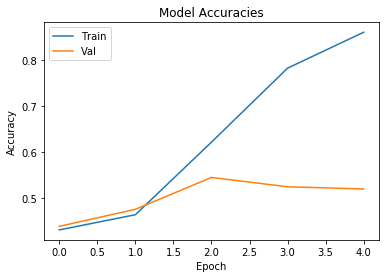

In [37]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'])
plt.show()

In [13]:
# With stop word removal, demojizing, string.punctuation word remova, vocab size 10000, padding at 50, get 0.54 val accuracy 
# decresing vocab size to 5000 causes bad results and strange effects
# adding dropout 0.1 between embedding and lstm made it worse by 2%

In [38]:
y_pred = model.predict(x_val)
y_pred = np.array([[1 if i == max(sc) else 0 for i in sc] for sc in y_pred])
y_pred_text = onehot_encoder.inverse_transform(y_pred)
y_val_text = onehot_encoder.inverse_transform(y_val)

In [39]:
cm = confusion_matrix(y_val_text, y_pred_text)

In [40]:
# Rows are the actual, columns are the predicted.  negative, neutral, positve
print(cm)
recall1 = cm[0][0] / (cm[0][0] + cm[0][1] + cm[0][2])
recall2 = cm[1][1] / (cm[1][0] + cm[1][1] + cm[1][2])
recall3 = cm[2][2] / (cm[2][0] + cm[2][1] + cm[2][2])
print(recall1,recall2,recall3)

[[172  89  24]
 [ 92 191  85]
 [ 33  80  73]]
0.6035087719298246 0.5190217391304348 0.3924731182795699


In [41]:
(cm[0][0] + cm[1][1] + cm[2][2])/sum(sum(cm))

0.5196662693682956